# Лабораторная работа по машинному обучению № 1. Предварительная обработка данных

## Выполнил: студент группы 15-АС Гордеев Максим

## Вариант 3 (Вторичный рынок машин)

## Цель лабораторной работы – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('autos.csv',encoding = 'latin1')

In [3]:
dataframe.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
dataframe.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [6]:
dataframe.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [7]:
dataframe.dropna()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17
14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,privat,Angebot,17999,control,suv,2011,manuell,190,navara,70000,3,diesel,nissan,nein,2016-03-21 00:00:00,0,4177,2016-04-06 07:45:42
17,2016-03-20 10:25:19,Renault_Twingo_1.2_16V_Aut.,privat,Angebot,1750,control,kleinwagen,2004,automatik,75,twingo,150000,2,benzin,renault,nein,2016-03-20 00:00:00,0,65599,2016-04-06 13:16:07
18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein,2016-03-23 00:00:00,0,88361,2016-04-05 18:45:11


In [8]:
dataframe.shape

(371528, 20)

In [9]:
dataframe.drop_duplicates()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


# 1. Удалите столбцы, ценность которых для оценки стоимости машины низка

In [10]:
dataframe = dataframe.drop(['dateCreated','postalCode','lastSeen'], axis = 1)

# 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных

In [11]:
dataframe = dataframe.drop_duplicates()
dataframe = dataframe.dropna()
dataframe.shape

(260943, 17)

# 3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя)

In [12]:
dataframe = dataframe[dataframe.yearOfRegistration > 2000]
dataframe = dataframe[(dataframe.price > 5000) & (dataframe.price < 7500)]
dataframe = dataframe[dataframe.powerPS < 100]

In [13]:
dataframe

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures
27,2016-03-07 12:51:23,Honda_Civic_1.4_i_VTEC_Comfort,privat,Angebot,6900,test,limousine,2008,manuell,99,civic,60000,11,benzin,honda,nein,0
43,2016-03-13 15:47:08,Mini_One_Pepper_Scheckheftgepflegt,privat,Angebot,6990,test,limousine,2007,manuell,95,one,100000,8,benzin,mini,nein,0
63,2016-03-30 12:49:54,Skoda_Fabia_1.2,privat,Angebot,5500,control,kleinwagen,2010,manuell,60,fabia,70000,4,benzin,skoda,nein,0
89,2016-03-08 13:49:57,Fiesta_Titanium_1.25,privat,Angebot,6800,control,kleinwagen,2009,manuell,82,fiesta,60000,12,benzin,ford,nein,0
136,2016-03-28 20:45:46,Fabia_II_Combi_Greenline_1_2_TDI_DPF_mit_Gebra...,privat,Angebot,6990,control,kombi,2012,manuell,75,fabia,100000,5,diesel,skoda,nein,0
188,2016-03-21 19:06:21,Volkswagen_Polo_1.4_United_1._Hand,privat,Angebot,5999,test,kleinwagen,2009,manuell,80,polo,125000,5,benzin,volkswagen,nein,0
302,2016-03-28 13:31:04,Volkswagen_Golf_1.9_TDI_Comfortline,privat,Angebot,5500,test,limousine,2004,manuell,90,golf,150000,10,diesel,volkswagen,nein,0
344,2016-03-19 23:54:43,Kia_Ceed_1.4_CVVT_Attract_blau_metallic_SHZ_HU...,privat,Angebot,5750,control,limousine,2010,manuell,90,ceed,100000,2,benzin,kia,nein,0
410,2016-03-30 12:58:13,Smart_smart_fortwo_cabrio_pulse_micro_hybrid_d...,privat,Angebot,5555,control,cabrio,2010,automatik,71,fortwo,90000,3,benzin,smart,nein,0
455,2016-03-12 14:39:17,Volkswagen_Golf_1.4_Tour,privat,Angebot,5500,test,limousine,2007,manuell,80,golf,125000,7,benzin,volkswagen,nein,0


# 4. Заполнить пропущенные данные в строковых полях

In [14]:
dataframe = dataframe.fillna(0)

# 5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу

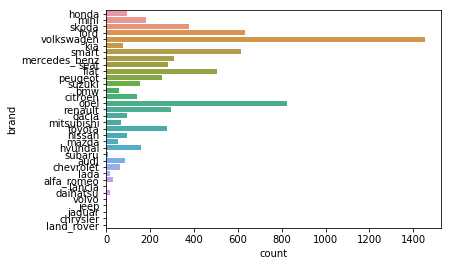

In [15]:
sns.countplot(data=dataframe, y='brand')
plt.show()

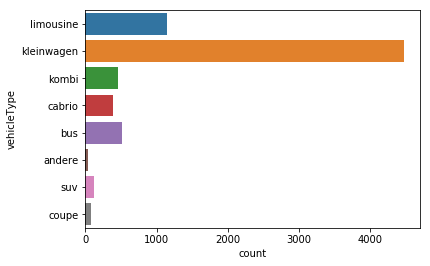

In [16]:
sns.countplot(data=dataframe, y='vehicleType')
plt.show()

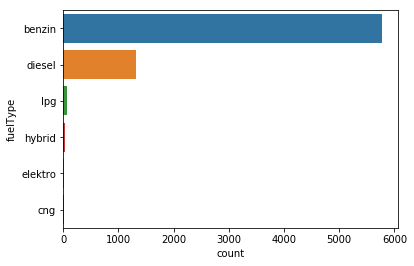

In [17]:
sns.countplot(data=dataframe, y='fuelType')
plt.show()

# 6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля

In [18]:
def get_len_name(name):
    return str(len(name.split('\n')[0].strip()))
    
list_len = dataframe['name'].apply(get_len_name)

dataframe['len_of_name'] = list_len
dataframe.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,len_of_name
27,2016-03-07 12:51:23,Honda_Civic_1.4_i_VTEC_Comfort,privat,Angebot,6900,test,limousine,2008,manuell,99,civic,60000,11,benzin,honda,nein,0,30
43,2016-03-13 15:47:08,Mini_One_Pepper_Scheckheftgepflegt,privat,Angebot,6990,test,limousine,2007,manuell,95,one,100000,8,benzin,mini,nein,0,34
63,2016-03-30 12:49:54,Skoda_Fabia_1.2,privat,Angebot,5500,control,kleinwagen,2010,manuell,60,fabia,70000,4,benzin,skoda,nein,0,15
89,2016-03-08 13:49:57,Fiesta_Titanium_1.25,privat,Angebot,6800,control,kleinwagen,2009,manuell,82,fiesta,60000,12,benzin,ford,nein,0,20
136,2016-03-28 20:45:46,Fabia_II_Combi_Greenline_1_2_TDI_DPF_mit_Gebra...,privat,Angebot,6990,control,kombi,2012,manuell,75,fabia,100000,5,diesel,skoda,nein,0,63


# 7. Постройте карту корреляций между признаками

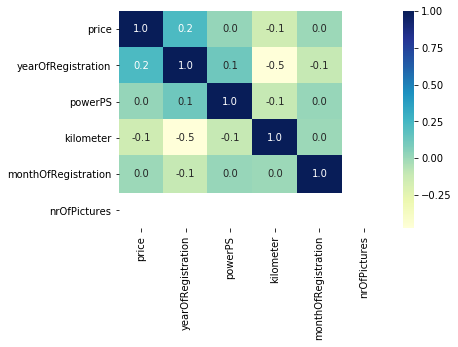

In [19]:
sns.heatmap(dataframe.corr(), cmap = 'YlGnBu', annot=True, fmt='.1f')
plt.plot()
plt.show()

# 8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и количеством пройденных километров. Оцените значение p-value. Постройте плотность распределения признаков

In [20]:
print(dataframe[['price','kilometer']].corr(method='pearson'))
print(dataframe[['price', 'kilometer']].corr(method='spearman'))

              price  kilometer
price      1.000000  -0.148017
kilometer -0.148017   1.000000
              price  kilometer
price      1.000000  -0.153897
kilometer -0.153897   1.000000


Построим skatter plot:

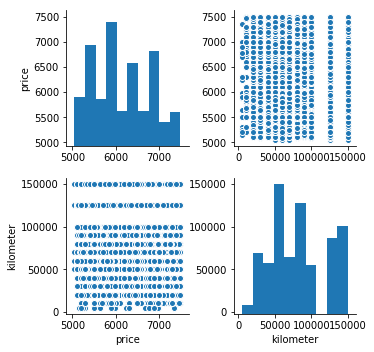

In [21]:
sns.pairplot(dataframe[['price','kilometer']])
plt.show()

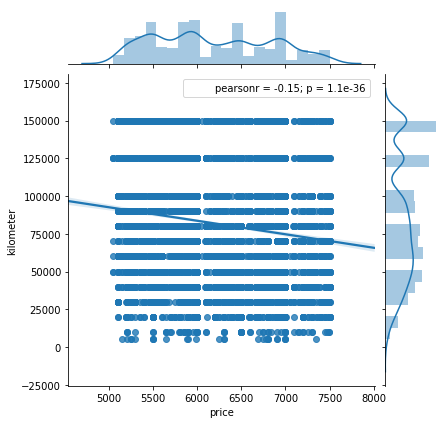

In [23]:
sns.jointplot(x='price', y='kilometer', data=dataframe, kind='reg');
plt.xlabel("price");
plt.ylabel("kilometer");
plt.show();

Получили значение p-value из графика плотности распределения, равное 1.1e-36

Ибо p-value меньше уровня значимости 1% (1.1e-36 < 0.01) гипотеза о статистической взаимосвязи между величинами может считаться верной

# 9. Добавьте в набор данных признак, являющийся суммой двух других признаков

In [24]:
dataframe['sum'] = dataframe['price'] + dataframe['powerPS']
dataframe.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,len_of_name,sum
27,2016-03-07 12:51:23,Honda_Civic_1.4_i_VTEC_Comfort,privat,Angebot,6900,test,limousine,2008,manuell,99,civic,60000,11,benzin,honda,nein,0,30,6999
43,2016-03-13 15:47:08,Mini_One_Pepper_Scheckheftgepflegt,privat,Angebot,6990,test,limousine,2007,manuell,95,one,100000,8,benzin,mini,nein,0,34,7085
63,2016-03-30 12:49:54,Skoda_Fabia_1.2,privat,Angebot,5500,control,kleinwagen,2010,manuell,60,fabia,70000,4,benzin,skoda,nein,0,15,5560
89,2016-03-08 13:49:57,Fiesta_Titanium_1.25,privat,Angebot,6800,control,kleinwagen,2009,manuell,82,fiesta,60000,12,benzin,ford,nein,0,20,6882
136,2016-03-28 20:45:46,Fabia_II_Combi_Greenline_1_2_TDI_DPF_mit_Gebra...,privat,Angebot,6990,control,kombi,2012,manuell,75,fabia,100000,5,diesel,skoda,nein,0,63,7065
